<a href="https://colab.research.google.com/github/ZacharyFry1/DD-Science-Cohort15/blob/main/Project_4_Version_3_XGB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 4 Music Popularity Prediction

## Problem Definition


The goal of this project was to develop a model with the lowest RMSE value that would predict the popularity of a song. There were no clear targets for this project but I chose Streams to be the target because the number of streams directly correlates with the popularity of the song. As such this is a supervised learning model, and I used regression trees, random forest trees, and extreme boosting to develop a model to lower the RMSE (i.e. the number of streams).

## Data Collection/Sources


Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import graphviz
from IPython.display import display
from sklearn import tree
import pickle
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import seaborn as sns

Reading in the dataframe.

In [ ]:
url = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.4-Spotify/Data/Spotify.csv'

In [ ]:
spotify_dataframe_original = pd.read_csv('https://ddc-datascience.s3.amazonaws.com/Projects/Project.4-Spotify/Data/Spotify.csv')

In [ ]:
spotify_dataframe_original

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,1552,195,1,2019-12-27--2020-01-03,New Rules,"4,630,675",Dua Lipa,27167675,2ekn2ttSfGqwhhate0LSR0,"['dance pop', 'pop', 'uk pop']",...,0.762,0.7,-6.021,0.0694,0.00261,0.153,116.073,209320,0.608,A
1552,1553,196,1,2019-12-27--2020-01-03,Cheirosa - Ao Vivo,"4,623,030",Jorge & Mateus,15019109,2PWjKmjyTZeDpmOUa3a5da,"['sertanejo', 'sertanejo universitario']",...,0.528,0.87,-3.123,0.0851,0.24,0.333,152.37,181930,0.714,B
1553,1554,197,1,2019-12-27--2020-01-03,Havana (feat. Young Thug),"4,620,876",Camila Cabello,22698747,1rfofaqEpACxVEHIZBJe6W,"['dance pop', 'electropop', 'pop', 'post-teen ...",...,0.765,0.523,-4.333,0.03,0.184,0.132,104.988,217307,0.394,D
1554,1555,198,1,2019-12-27--2020-01-03,Surtada - Remix Brega Funk,"4,607,385","Dadá Boladão, Tati Zaqui, OIK",208630,5F8ffc8KWKNawllr5WsW0r,"['brega funk', 'funk carioca']",...,0.832,0.55,-7.026,0.0587,0.249,0.182,154.064,152784,0.881,F


In [ ]:
spotify_dataframe_original.head().transpose()

,0,1,2,3,4
Index,1,2,3,4,5
Highest Charting Position,1,2,1,3,5
Number of Times Charted,8,3,11,5,1
Week of Highest Charting,2021-07-23--2021-07-30,2021-07-23--2021-07-30,2021-06-25--2021-07-02,2021-07-02--2021-07-09,2021-07-23--2021-07-30
Song Name,Beggin',STAY (with Justin Bieber),good 4 u,Bad Habits,INDUSTRY BABY (feat. Jack Harlow)
Streams,"48,633,449","47,248,719","40,162,559","37,799,456","33,948,454"
Artist,Måneskin,The Kid LAROI,Olivia Rodrigo,Ed Sheeran,Lil Nas X
Artist Followers,3377762,2230022,6266514,83293380,5473565
Song ID,3Wrjm47oTz2sjIgck11l5e,5HCyWlXZPP0y6Gqq8TgA20,4ZtFanR9U6ndgddUvNcjcG,6PQ88X9TkUIAUIZJHW2upE,27NovPIUIRrOZoCHxABJwK
Genre,"['indie rock italiano', 'italian pop']",['australian hip hop'],['pop'],"['pop', 'uk pop']","['lgbtq+ hip hop', 'pop rap']"


## Data Cleaning


I need to get a feel for the data. So I'll do info, isnull, shape,

In [ ]:
spotify_dataframe_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      1556 non-null   int64 
 1   Highest Charting Position  1556 non-null   int64 
 2   Number of Times Charted    1556 non-null   int64 
 3   Week of Highest Charting   1556 non-null   object
 4   Song Name                  1556 non-null   object
 5   Streams                    1556 non-null   object
 6   Artist                     1556 non-null   object
 7   Artist Followers           1556 non-null   object
 8   Song ID                    1556 non-null   object
 9   Genre                      1556 non-null   object
 10  Release Date               1556 non-null   object
 11  Weeks Charted              1556 non-null   object
 12  Popularity                 1556 non-null   object
 13  Danceability               1556 non-null   object
 14  Energy  

In [ ]:
spotify_dataframe_original.shape

(1556, 23)

In [ ]:
spotify_dataframe_original.isnull().sum().sum()

0

In [ ]:
spotify_dataframe_original['Streams'][2]

'40,162,559'

### Identifying identifier columns.

Index is an identifier column.

In [ ]:
len(spotify_dataframe_original['Index'].unique())

1556

Song ID is also likely an identifier column.

In [ ]:
len(spotify_dataframe_original['Song ID'].unique())

1517

Song Name is an identifier column as well.

In [ ]:
len(spotify_dataframe_original['Song Name'].unique())

1556

Artist is not an identifier column, but it has many unique values, so I will drop it too.

In [ ]:
len(spotify_dataframe_original['Artist'].unique())

716

### Dropping Identifier columns

In [ ]:
spotify_dataframe_clean = spotify_dataframe_original.copy()

Here I am dropping the clear identifier columns.

In [ ]:
spotify_dataframe_clean = spotify_dataframe_original.drop(['Index', 'Song ID', 'Song Name'], axis = 1)

In [ ]:
spotify_dataframe_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Highest Charting Position  1556 non-null   int64 
 1   Number of Times Charted    1556 non-null   int64 
 2   Week of Highest Charting   1556 non-null   object
 3   Streams                    1556 non-null   object
 4   Artist                     1556 non-null   object
 5   Artist Followers           1556 non-null   object
 6   Genre                      1556 non-null   object
 7   Release Date               1556 non-null   object
 8   Weeks Charted              1556 non-null   object
 9   Popularity                 1556 non-null   object
 10  Danceability               1556 non-null   object
 11  Energy                     1556 non-null   object
 12  Loudness                   1556 non-null   object
 13  Speechiness                1556 non-null   object
 14  Acoustic

In [ ]:
spotify_dataframe_clean.shape

(1556, 20)

So everything is a sting except for Highest Charting Position and Number of Times Charted. Lovely. These will need to be transformed into something pandas can interpret.


In [ ]:
spotify_dataframe_clean.iloc[0].map(type)

,0
Highest Charting Position,<class 'numpy.int64'>
Number of Times Charted,<class 'numpy.int64'>
Week of Highest Charting,<class 'str'>
Streams,<class 'str'>
Artist,<class 'str'>
Artist Followers,<class 'str'>
Genre,<class 'str'>
Release Date,<class 'str'>
Weeks Charted,<class 'str'>
Popularity,<class 'str'>


In [ ]:
spotify_dataframe_clean.head().transpose()

,0,1,2,3,4
Highest Charting Position,1,2,1,3,5
Number of Times Charted,8,3,11,5,1
Week of Highest Charting,2021-07-23--2021-07-30,2021-07-23--2021-07-30,2021-06-25--2021-07-02,2021-07-02--2021-07-09,2021-07-23--2021-07-30
Streams,"48,633,449","47,248,719","40,162,559","37,799,456","33,948,454"
Artist,Måneskin,The Kid LAROI,Olivia Rodrigo,Ed Sheeran,Lil Nas X
Artist Followers,3377762,2230022,6266514,83293380,5473565
Genre,"['indie rock italiano', 'italian pop']",['australian hip hop'],['pop'],"['pop', 'uk pop']","['lgbtq+ hip hop', 'pop rap']"
Release Date,2017-12-08,2021-07-09,2021-05-21,2021-06-25,2021-07-23
Weeks Charted,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,2021-07-23--2021-07-30
Popularity,100,99,99,98,96


### Dropping Artist, Genre and Chord

I'm dropping these columns because I want to avoid encoding columns if I can.

In [ ]:
spotify_dataframe_clean = spotify_dataframe_clean.drop(['Genre', 'Artist', 'Chord'], axis = 1)
spotify_dataframe_clean.head().transpose()

,0,1,2,3,4
Highest Charting Position,1,2,1,3,5
Number of Times Charted,8,3,11,5,1
Week of Highest Charting,2021-07-23--2021-07-30,2021-07-23--2021-07-30,2021-06-25--2021-07-02,2021-07-02--2021-07-09,2021-07-23--2021-07-30
Streams,"48,633,449","47,248,719","40,162,559","37,799,456","33,948,454"
Artist Followers,3377762,2230022,6266514,83293380,5473565
Release Date,2017-12-08,2021-07-09,2021-05-21,2021-06-25,2021-07-23
Weeks Charted,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,2021-07-23--2021-07-30
Popularity,100,99,99,98,96
Danceability,0.714,0.591,0.563,0.808,0.736
Energy,0.8,0.764,0.664,0.897,0.704


### Converting Week of Highest Charting, Weeks Charted, and Release Date to a numerical format.

I'm choosing these columns because they seem to be the most intuitive to change from strings to datetimes to integers or floats. The other columns I still have left will be converted as well, but they already contain numbers so I will do those all at once.

In [ ]:
spotify_dataframe_clean['Week of Highest Charting'] = spotify_dataframe_clean['Week of Highest Charting'].str.replace('--', '/')

In [ ]:
spotify_dataframe_clean['Week of Highest Charting'].head()

,Week of Highest Charting
0,2021-07-23/2021-07-30
1,2021-07-23/2021-07-30
2,2021-06-25/2021-07-02
3,2021-07-02/2021-07-09
4,2021-07-23/2021-07-30


First I replaced the -- with / and then I split the column Week of Highest Charting into two columns, Start Date and End Date.

In [ ]:
spotify_dataframe_clean[['Start Date Highest Charted', 'End Date Highest Charted']] = spotify_dataframe_clean['Week of Highest Charting'].str.split('/', expand = True)

In [ ]:
spotify_dataframe_clean.head().transpose()

,0,1,2,3,4
Highest Charting Position,1,2,1,3,5
Number of Times Charted,8,3,11,5,1
Week of Highest Charting,2021-07-23/2021-07-30,2021-07-23/2021-07-30,2021-06-25/2021-07-02,2021-07-02/2021-07-09,2021-07-23/2021-07-30
Streams,"48,633,449","47,248,719","40,162,559","37,799,456","33,948,454"
Artist Followers,3377762,2230022,6266514,83293380,5473565
Release Date,2017-12-08,2021-07-09,2021-05-21,2021-06-25,2021-07-23
Weeks Charted,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,2021-07-23--2021-07-30
Popularity,100,99,99,98,96
Danceability,0.714,0.591,0.563,0.808,0.736
Energy,0.8,0.764,0.664,0.897,0.704


Dropped the redundant column.

In [ ]:
spotify_dataframe_clean = spotify_dataframe_clean.drop(['Week of Highest Charting'], axis = 1)

Wrote a for loop to replace - with / in both columns. This is necessary to convert them into date times.

In [ ]:
for column in ['Start Date Highest Charted', 'End Date Highest Charted']:
    spotify_dataframe_clean[column] = spotify_dataframe_clean[column].str.replace('-', '/')

Converting the columns to date times.

In [ ]:
spotify_dataframe_clean['Start Date Highest Charted'] = pd.to_datetime(spotify_dataframe_clean['Start Date Highest Charted'], format='%Y/%m/%d')
spotify_dataframe_clean['End Date Highest Charted'] = pd.to_datetime(spotify_dataframe_clean['End Date Highest Charted'], format='%Y/%m/%d')

In [ ]:
spotify_dataframe_clean.head().transpose()

,0,1,2,3,4
Highest Charting Position,1,2,1,3,5
Number of Times Charted,8,3,11,5,1
Streams,"48,633,449","47,248,719","40,162,559","37,799,456","33,948,454"
Artist Followers,3377762,2230022,6266514,83293380,5473565
Release Date,2017-12-08,2021-07-09,2021-05-21,2021-06-25,2021-07-23
Weeks Charted,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,2021-07-23--2021-07-30
Popularity,100,99,99,98,96
Danceability,0.714,0.591,0.563,0.808,0.736
Energy,0.8,0.764,0.664,0.897,0.704
Loudness,-4.808,-5.484,-5.044,-3.712,-7.409


Replacing - with / in relase date to format it for date time conversion.

In [ ]:
spotify_dataframe_clean['Release Date'] = spotify_dataframe_clean['Release Date'].str.replace('-', '/')

In [ ]:
spotify_dataframe_clean['Release Date'].isnull().sum()

0

Converting Release Date into Datetime format.

In [ ]:
spotify_dataframe_clean['Release Date'] = pd.to_datetime(spotify_dataframe_clean['Release Date'], format='%Y/%m/%d', errors = 'coerce')

In [ ]:
spotify_dataframe_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Highest Charting Position   1556 non-null   int64         
 1   Number of Times Charted     1556 non-null   int64         
 2   Streams                     1556 non-null   object        
 3   Artist Followers            1556 non-null   object        
 4   Release Date                1528 non-null   datetime64[ns]
 5   Weeks Charted               1556 non-null   object        
 6   Popularity                  1556 non-null   object        
 7   Danceability                1556 non-null   object        
 8   Energy                      1556 non-null   object        
 9   Loudness                    1556 non-null   object        
 10  Speechiness                 1556 non-null   object        
 11  Acousticness                1556 non-null   object      

Weeks Charted.


In [ ]:
spotify_dataframe_clean.head().transpose()

,0,1,2,3,4
Highest Charting Position,1,2,1,3,5
Number of Times Charted,8,3,11,5,1
Streams,"48,633,449","47,248,719","40,162,559","37,799,456","33,948,454"
Artist Followers,3377762,2230022,6266514,83293380,5473565
Release Date,2017-12-08 00:00:00,2021-07-09 00:00:00,2021-05-21 00:00:00,2021-06-25 00:00:00,2021-07-23 00:00:00
Weeks Charted,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,2021-07-23--2021-07-30
Popularity,100,99,99,98,96
Danceability,0.714,0.591,0.563,0.808,0.736
Energy,0.8,0.764,0.664,0.897,0.704
Loudness,-4.808,-5.484,-5.044,-3.712,-7.409


Splitting the weeks charted at the \n if it had one, then formatting it to a datetime.

In [ ]:
spotify_dataframe_clean['Weeks Charted'] = spotify_dataframe_clean['Weeks Charted'].str.split('\n').apply(lambda dates: [pd.to_datetime(d, format='%Y/%m/%d', errors='coerce') for d in dates])

Turning the column into an integer by using the apply len method to the datetime format.

In [ ]:
spotify_dataframe_clean['Number of Weeks Charted'] = spotify_dataframe_clean['Weeks Charted'].apply(len)

Dropping the redundant column.

In [ ]:
spotify_dataframe_clean = spotify_dataframe_clean.drop(['Weeks Charted'], axis = 1)

In [ ]:
spotify_dataframe_clean = spotify_dataframe_clean.dropna()

In [ ]:
spotify_dataframe_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1528 entries, 0 to 1555
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Highest Charting Position   1528 non-null   int64         
 1   Number of Times Charted     1528 non-null   int64         
 2   Streams                     1528 non-null   object        
 3   Artist Followers            1528 non-null   object        
 4   Release Date                1528 non-null   datetime64[ns]
 5   Popularity                  1528 non-null   object        
 6   Danceability                1528 non-null   object        
 7   Energy                      1528 non-null   object        
 8   Loudness                    1528 non-null   object        
 9   Speechiness                 1528 non-null   object        
 10  Acousticness                1528 non-null   object        
 11  Liveness                    1528 non-null   object        
 1

### Converting the Strings into floats.

Separating the object columns from the rest of the dataframe.

In [ ]:
object_columns = spotify_dataframe_clean.select_dtypes(include = ['object']).columns

Writing a for loop to replace all the , and random spaces so they could all be turned into floats.

In [ ]:
for col in object_columns:
       spotify_dataframe_clean[col] = pd.to_numeric(spotify_dataframe_clean[col].str.replace(',', '').str.replace(' ', ''), errors='coerce')

Streams randomly didn't get formatted so I had to convert it separately to a float.

In [ ]:
spotify_dataframe_clean['Streams'] = spotify_dataframe_clean['Streams'].astype(float)

In [ ]:
spotify_dataframe_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1528 entries, 0 to 1555
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Highest Charting Position   1528 non-null   int64         
 1   Number of Times Charted     1528 non-null   int64         
 2   Streams                     1528 non-null   float64       
 3   Artist Followers            1528 non-null   int64         
 4   Release Date                1528 non-null   datetime64[ns]
 5   Popularity                  1528 non-null   int64         
 6   Danceability                1528 non-null   float64       
 7   Energy                      1528 non-null   float64       
 8   Loudness                    1528 non-null   float64       
 9   Speechiness                 1528 non-null   float64       
 10  Acousticness                1528 non-null   float64       
 11  Liveness                    1528 non-null   float64       
 1

In [ ]:
spotify_dataframe_clean['Number of Weeks Charted']

,Number of Weeks Charted
0,8
1,3
2,11
3,5
4,1
...,...
1551,1
1552,1
1553,1
1554,1


Converting datetime to ordinal values using a lambda function. Datetime can not be put into a regression model, so you have to make it into a numerical format.

In [ ]:
for col in ['Start Date Highest Charted', 'End Date Highest Charted', 'Release Date']:
    spotify_dataframe_clean[col] = spotify_dataframe_clean[col].apply(lambda date: date.toordinal())

Getting rid of 0's.

In [ ]:
spotify_dataframe_clean = spotify_dataframe_clean[(spotify_dataframe_clean != 0).all(axis=1)]

In [ ]:
spotify_dataframe_clean.eq(0).sum().sum()

0

## Exploratory Data Analysis


### Extreme Boost

Splitting the data.

In [ ]:
X = spotify_dataframe_clean.drop('Streams', axis = 1)
y = spotify_dataframe_clean['Streams']

Train test split, choosing the model, fitting the model, then predicting the outcome.

In [ ]:
numLoops = 500

rms_error = np.zeros(numLoops)

for idx in range(0,numLoops):
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
  xgbr = xgb.XGBRegressor(objective = 'reg:squarederror', verbosity = 0, seed = 1 )
  xgbr.fit(X_train, y_train)
  y_pred_xgb = xgbr.predict(X_test)
  rms_error[idx] = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print(f"CV RMSE: {rms_error.mean().round(2)*1}")

CV RMSE: 1296898.11


### Choosing the Best Fit

In [ ]:
param_test = {
 'max_depth'     : [ 3, 4, 5, 6, 7 ],
 'learning_rate' : [ 0.1, 0.2, 0.3, 0.4 ],
 'n_estimators'  : [ 20, 40, 60, 80, 100, 120, 140 ],
}

gsearch = GridSearchCV(
    estimator = xgb.XGBRegressor( objective = 'reg:squarederror', seed = 10 ),
    param_grid = param_test,
    scoring = 'neg_mean_squared_error',
    cv = 5,
)


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.05, random_state = 42 )
model = gsearch.fit(X_train,y_train)

print(model.best_params_)

{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 120}


## Processing


### Applying the best fit Parameters

In [ ]:
numLoops = 100

rms_error = np.zeros(numLoops)

for idx in range(0,numLoops):
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
  xgbr = xgb.XGBRegressor(
      objective = 'reg:squarederror',
      verbosity = 0,
      learning_rate = 0.2,
      max_depth = 5,
      n_estimators = 120,
      seed = 10 )
  xgbr.fit(X_train, y_train)
  y_pred_xgb = xgbr.predict(X_test)
  rms_error[idx] = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print(f"CV RMSE: {rms_error.mean().round(2)*1}")

CV RMSE: 1258573.34


## Data Visualization/Communication of Results


### Important Predictors

<ipython-input-51-16d4b8a6cfd6>:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels( ax.get_xticklabels(), rotation = 90 )


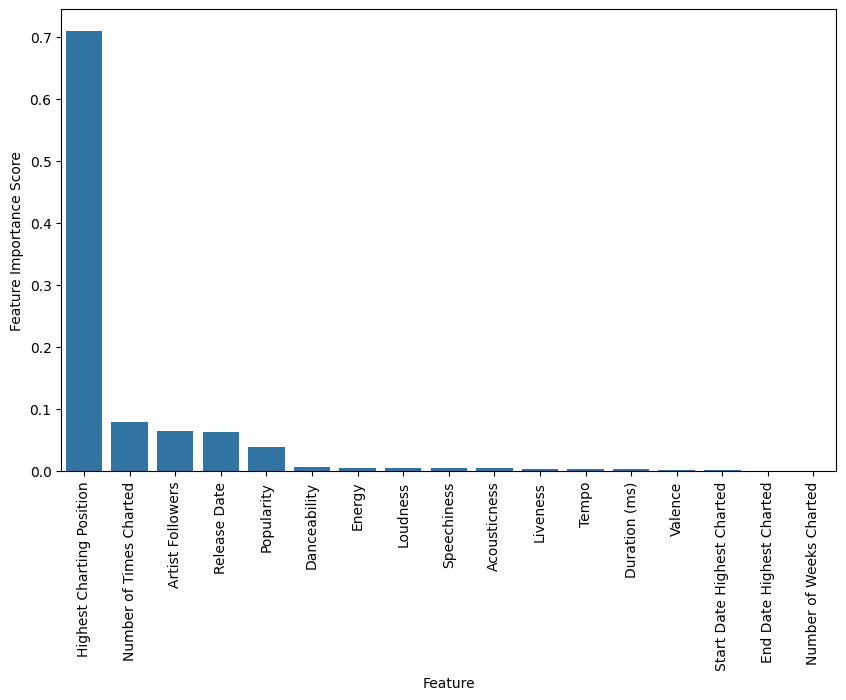

In [ ]:
feat_imp = pd.Series(xgbr.feature_importances_, index=X.columns)
plt.figure(figsize = (10,6))
# ax = sns.barplot(x = feat_imp.index, y = feat_imp.values)
ax = sns.barplot(x = feat_imp.index, y = feat_imp.sort_values( ascending = False ).values )
ax.set_xticklabels( ax.get_xticklabels(), rotation = 90 )
plt.xlabel('Feature')
plt.ylabel('Feature Importance Score') ;


In [ ]:
(feat_imp.sort_values( ascending = False )*100).cumsum()

,0
Popularity,70.926193
Highest Charting Position,78.840599
Start Date Highest Charted,85.319244
Number of Times Charted,91.633507
Release Date,95.499466
Artist Followers,96.243515
Energy,96.841927
Valence,97.415344
Duration (ms),97.898506
Tempo,98.373795


In [ ]:
1749624.16 - 1217898.15

531726.01

## Conclusions

**RMSE VALUES**
* MVP RMSE WITH BEST DEPTH: 1749624.16
* Version 1 RMSE WITH BEST DEPTH: 1762612.35 (more added features)
* Version 2 Random Forest RMSE WITH BEST DEPTH: 1301353.43
* Version 3 XGB: 1286151.05
* Version 3 XGB with adjusted parameters: 1217898.15

In conclusion, using the XBG boost model provided the lowest RMSE value (for the streams). It was 530K less than my MVP. This is a great result! Much of the data was contained as unusable strings and it took a considerable effort to clean them up so they could be used in the analysis. In my XGB model the three most important predictors were 1. Highest Charted Position, 2. Number of Times Charted, and 3. Artist followers. In contrast, my random forest model's three most important features were: 1. Popularity, 2. Highest Charting Position, and 3. Number of Weeks charted. Interestingly, popularity was fifth on my XGB model. Number of times charted appeared high up in both models, so this is probably a good indicator of how many streams an artist will get. In addition, number of weeks charted was one of the worst predictors in how many streams aka the poularity of a song, which I find very suprising. This is more than likely a limitation of the model.


